In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model  # will be using for plotting trend line
from sklearn.preprocessing import MinMaxScaler # for normalizing data
from sklearn.cluster import KMeans 
pd.set_option('display.max_rows', 1000)
%matplotlib inline
from difflib import SequenceMatcher
import seaborn as sn
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression


In [2]:
data = pd.read_csv("final_cleaned_spotify.csv")
data.shape

(137014, 20)

In [3]:
data.head()

,name,artists,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year,pop_artist,Top100,artist_already_pop
0,!Que Vida! - Mono Version,['Love'],0.525000,0.600,220560.0,0.540,0.0,0.00305,9.0,0.100,-11.803,1.0,26.0,0.0328,125.898,0.547,1966,0,0,0
1,"""40""",['U2'],0.228000,0.368,157840.0,0.480,0.0,0.70700,8.0,0.159,-11.605,1.0,21.0,0.0306,150.166,0.338,1983,0,0,0
2,"""40"" - Live",['U2'],0.099800,0.272,226200.0,0.684,0.0,0.01450,8.0,0.946,-9.728,1.0,41.0,0.0505,143.079,0.279,1983,0,0,0
3,"""40"" - Remastered 2008",['U2'],0.185000,0.371,157667.0,0.545,0.0,0.58200,8.0,0.183,-9.315,1.0,36.0,0.0307,150.316,0.310,1983,0,0,0
4,"""45""",['The Gaslight Anthem'],0.000696,0.315,202493.0,0.970,0.0,0.00000,8.0,0.277,-4.709,1.0,48.0,0.1020,178.068,0.423,2012,1,0,0


In [4]:
data["pop_artist"].value_counts()


1    84394
0    52620
Name: pop_artist, dtype: int64

In [5]:
data["Top100"].value_counts()

0    133342
1      3672
Name: Top100, dtype: int64

In [6]:

data["artist_already_pop"].value_counts()

0    117543
1     19471
Name: artist_already_pop, dtype: int64

In [21]:
data_graph= data[["acousticness","danceability","energy","instrumentalness","liveness","speechiness","valence","Top100"]]
data_graph_year =  data[["year","acousticness","danceability","energy","instrumentalness","liveness","speechiness","valence","Top100"]]
data_graph_year_40 = data_graph_year[data_graph_year['year'] < 1950]
data_graph_year_50 = data_graph_year[(data_graph_year['year'] >= 1950) & (data_graph_year['year'] < 1960)]
data_graph_year_60 = data_graph_year[(data_graph_year['year'] >= 1960) & (data_graph_year['year'] < 1970)]
data_graph_year_70 = data_graph_year[(data_graph_year['year'] >= 1970) & (data_graph_year['year'] < 1960)]
data_graph_year_80 = data_graph_year[(data_graph_year['year'] >= 1980) & (data_graph_year['year'] < 1990)]
data_graph_year_90 = data_graph_year[(data_graph_year['year'] >= 1990) & (data_graph_year['year'] < 2000)]
data_graph_year_0 = data_graph_year[(data_graph_year['year'] >= 2000) & (data_graph_year['year'] < 2010)]
data_graph_year_10 = data_graph_year[(data_graph_year['year'] >= 2010) & (data_graph_year['year'] < 2021)]




,year,acousticness,danceability,energy,instrumentalness,liveness,speechiness,valence,Top100
1,1983,0.228000,0.368000,0.480000,0.707000,0.159000,0.030600,0.338000,0
2,1983,0.099800,0.272000,0.684000,0.014500,0.946000,0.050500,0.279000,0
3,1983,0.185000,0.371000,0.545000,0.582000,0.183000,0.030700,0.310000,0
11,1982,0.900000,0.521000,0.527000,0.000004,0.753000,0.918000,0.212000,0
21,1988,0.860000,0.458000,0.323000,0.000000,0.117000,0.050300,0.043200,0
54,1986,0.001260,0.447000,0.965000,0.658000,0.102000,0.043800,0.430000,0
57,1984,0.014400,0.576000,0.820000,0.739000,0.200000,0.113000,0.445000,0
66,1981,0.011700,0.690000,0.832000,0.018400,0.280000,0.058800,0.795000,0
91,1987,0.407000,0.604000,0.681000,0.000003,0.074000,0.025200,0.897000,0
93,1982,0.483000,0.710000,0.586000,0.000000,0.055600,0.027500,0.930000,0


In [10]:

data_graph = data_graph.groupby(["Top100"], as_index=False).mean()
df = data_graph.transpose()
df.columns = df.iloc[0]
df = df[1:]
df = df.rename(columns={df.columns[0]: "Not Hit", df.columns[1]: "Hit"})


In [11]:
df

Top100,Not Hit,Hit
acousticness,0.451176,0.273631
danceability,0.535693,0.618856
energy,0.515098,0.612351
instrumentalness,0.142370,0.024183
liveness,0.205931,0.175167
speechiness,0.081646,0.065930
valence,0.524557,0.605258


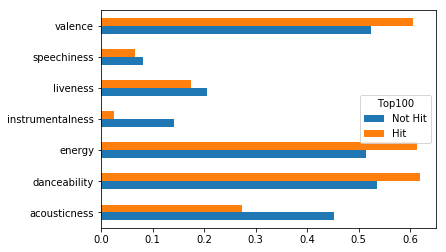

In [12]:

df.plot.barh()

The predominant variables within the two categories are the same: energy, danceability and valence. The only difference is that the average values ​​of these variables are higher for the hit songs category.

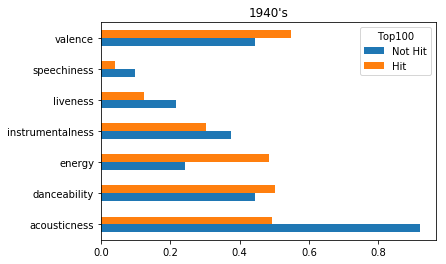

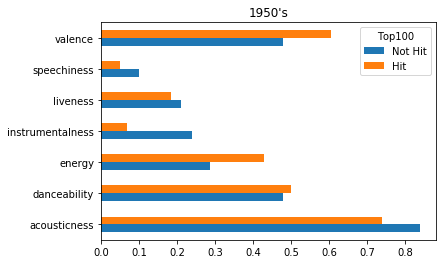

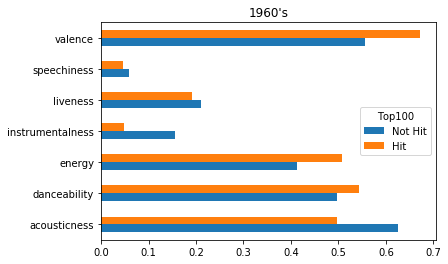

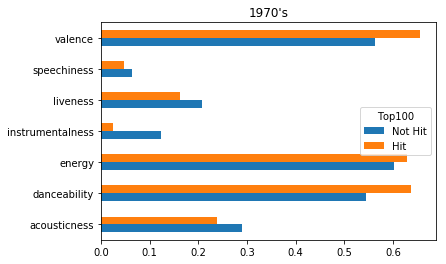

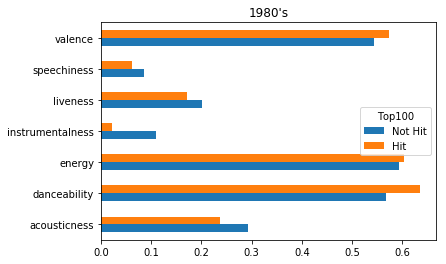

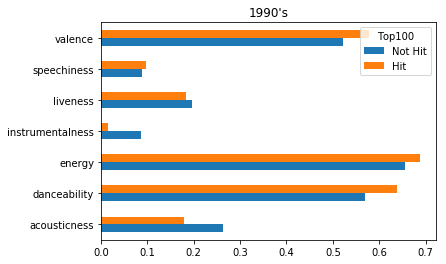

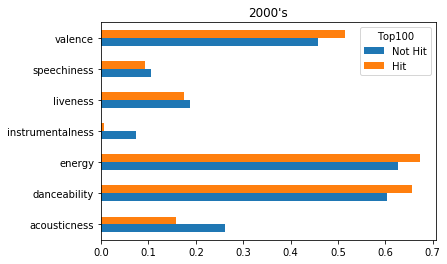

In [36]:
#data_graph_year_70 - not htis???
dflist = [data_graph_year_40, data_graph_year_50, data_graph_year_60,data_graph_year_80,data_graph_year_90,data_graph_year_0,data_graph_year_10]
year = 1940
for df in dflist:
    df = df.drop(columns=["year"])
    df = df.groupby(["Top100"], as_index=False).mean()
    df_n = df.transpose()
    df_n.columns = df_n.iloc[0]
    df_n = df_n[1:]
    df_n = df_n.rename(columns={df_n.columns[0]: "Not Hit", df_n.columns[1]: "Hit"})
    df_n.plot.barh(title=str(year)+"'s")
    year = year + 10


In [13]:
X = data[["acousticness","danceability","energy","instrumentalness","liveness","speechiness","valence"]]
y = data["Top100"]
clf = LogisticRegression(random_state=0).fit(X, y)
clf.fit(X, y)
print(clf.coef_[0])
weights = pd.DataFrame(columns=["Weight", "Feature"])
weights["Weight"] = clf.coef_[0]
weights["Feature"] = X.columns


/Users/adiepresent/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/adiepresent/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[-1.09614514  2.18604006  0.19293436 -2.62178561 -0.80605497 -3.72191341
  0.02450432]


In [14]:
weights.reindex(weights.Weight.abs().sort_values(ascending=False).index)

,Weight,Feature
5,-3.721913,speechiness
3,-2.621786,instrumentalness
1,2.186040,danceability
0,-1.096145,acousticness
4,-0.806055,liveness
2,0.192934,energy
6,0.024504,valence


The weights really dont pain't a clear picture about which variables are predominant. -- actually paints the opossitve about what we intially thought the predominant variables were. 



In [15]:
import lightgbm as lgb
clf = lgb.LGBMClassifier( boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.2, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=90, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0 )

/Users/adiepresent/anaconda3/lib/python3.7/site-packages/lightgbm/__init__.py:48: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


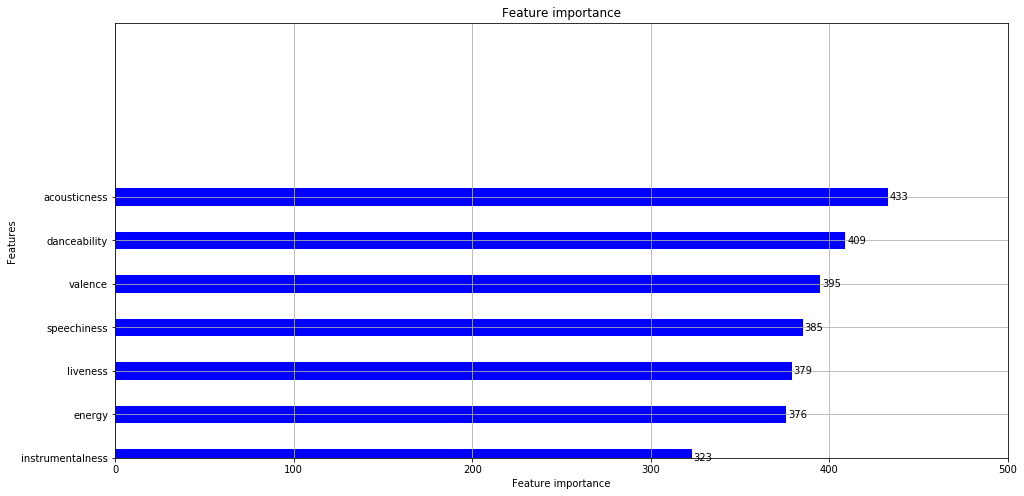

In [100]:
clf.fit(X, y)

ax=lgb.plot_importance(clf, height = 0.4,                  
                         max_num_features = 10, 
                         importance_type='split',
                         xlim = (0,500), ylim = (0,10),color='b', 
                         figsize = (16,8))


plt.show()

In [40]:
#predictability of logistic regression without popularity 
#error rate 


X = data[["acousticness","danceability","energy","instrumentalness","liveness","speechiness","valence"]]
y = data["Top100"]
clf = LogisticRegression(random_state=0).fit(X, y)
clf.fit(X, y)

/Users/adiepresent/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/adiepresent/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)
def find_error_rate(data, num):
    error_rates = []
    for i in np.arange(num):
        new_df = data.sample(frac=1)#shuffle data
        X = new_df.drop(columns=['Top100'])
        y = new_df["Top100"]
        X_train, X_test, y_train, y_test = train_test_split(X, y)
        clf = LogisticRegression(random_state=0,solver='lbfgs').fit(X_train, y_train).fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        error_rate = ((y_test != y_pred).sum())/(len(y_test))
        error_rates = np.append(error_rates, error_rate)
#     print(error_rates)
    average_error_rate = np.mean(error_rates)
    print("average error rate:", average_error_rate)

In [64]:
data_no_pop = data[["Top100", "acousticness","danceability","energy","instrumentalness","liveness","speechiness","valence"]]
find_error_rate(data_no_pop, 100)



average error rate: 0.026927950020435572


In [65]:
data_pop = data[["Top100", "acousticness","danceability","energy","instrumentalness","liveness","speechiness","valence","artist_already_pop","popularity"]]
find_error_rate(data_pop, 100)


/Users/adiepresent/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/adiepresent/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/adiepresent/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/adiepresent/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/adiepresent/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to conve

/Users/adiepresent/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/adiepresent/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/adiepresent/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/adiepresent/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/adiepresent/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to conve

/Users/adiepresent/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/adiepresent/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/adiepresent/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/adiepresent/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/adiepresent/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to conve

/Users/adiepresent/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/adiepresent/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/adiepresent/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/adiepresent/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/adiepresent/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to conve

/Users/adiepresent/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/adiepresent/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/adiepresent/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/adiepresent/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/adiepresent/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to conve

average error rate: 0.02692999357739242


/Users/adiepresent/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [12]:
X = data[["acousticness","danceability","energy","instrumentalness","liveness","speechiness","valence","artist_already_pop","popularity"]]
y = data["Top100"]
clf = LogisticRegression(random_state=0).fit(X, y)
clf.fit(X, y)
print(clf.coef_[0])
weights = pd.DataFrame(columns=["Weights", "Coefficient"])
weights["Weights"] = clf.coef_[0]
weights["Coefficient"] = X.columns

/Users/adiepresent/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/adiepresent/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[-0.60622501  0.41646465 -0.80472341 -2.01350516 -0.45811878 -3.88309401
  1.26760992 -0.17273068  0.05736292]


In [13]:
weights.reindex(weights.Weights.abs().sort_values(ascending=False).index)

,Weights,Coefficient
5,-3.883094,speechiness
3,-2.013505,instrumentalness
6,1.267610,valence
2,-0.804723,energy
0,-0.606225,acousticness
4,-0.458119,liveness
1,0.416465,danceability
7,-0.172731,artist_already_pop
8,0.057363,popularity


In [14]:
import lightgbm as lgb
clf = lgb.LGBMClassifier( boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.2, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=90, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0 )


/Users/adiepresent/anaconda3/lib/python3.7/site-packages/lightgbm/__init__.py:48: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [15]:
clf.fit(X, y)


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.2, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=90, n_jobs=-1, num_leaves=31, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

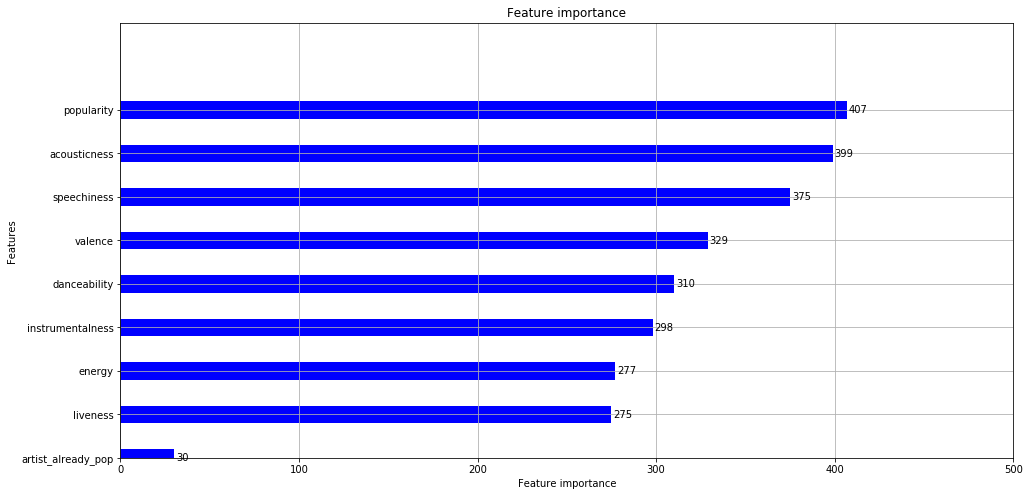

In [16]:
ax=lgb.plot_importance(clf, height = 0.4,                  
                         max_num_features = 10, 
                         importance_type='split',
                         xlim = (0,500), ylim = (0,10),color='b', 
                         figsize = (16,8))


plt.show()

In [16]:

from sklearn.tree import DecisionTreeRegressor
tree_clf = DecisionTreeRegressor().fit(X, y)
dfscores = pd.DataFrame(tree_clf.feature_importances_)
dffeatures = pd.DataFrame(X.columns)
featureScores = pd.concat([dffeatures, dfscores], axis=1)
featureScores.columns = ['Feature', 'Score']
feature = featureScores.sort_values(by=['Score'], ascending=False)
print(feature)


              Feature     Score
4            liveness  0.145746
0        acousticness  0.137470
1        danceability  0.133239
5         speechiness  0.131429
6             valence  0.127548
2              energy  0.124573
8          popularity  0.106139
3    instrumentalness  0.085105
7  artist_already_pop  0.008752


In [101]:
pop_data = data[data["pop_artist"] ==1]
pop_data_df = pop_data[["Top100", "acousticness","danceability","energy","instrumentalness","liveness","speechiness","valence","artist_already_pop","popularity"]]
find_error_rate(pop_data_df, 1)




/Users/adiepresent/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


average error rate: 0.04445708327408882


/Users/adiepresent/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [16]:
pop_data = data[data["pop_artist"] ==1]
pop_data_df = pop_data[["Top100", "acousticness","danceability","energy","instrumentalness","liveness","speechiness","valence"]]
data_no_pop = data[["Top100", "acousticness","danceability","energy","instrumentalness","liveness","speechiness","valence"]]
data_pop = data[["Top100", "acousticness","danceability","energy","instrumentalness","liveness","speechiness","valence","artist_already_pop","popularity"]]








In [66]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import recall_score

def recall_rate(data):
    X = data.drop(columns=['Top100'])
    y = data["Top100"]
    data_train = data.sample(frac=.8)
    data_test = pd.concat([data, data_train]).drop_duplicates(keep=False)  
#     X_train, X_test, y_train, y_test = train_test_split(X, y)
    sig_log_reg = smf.glm(formula = 'Top100 ~ acousticness:speechiness + speechiness + acousticness:danceability:speechiness + energy:speechiness + acousticness:energy:speechiness + acousticness:danceability:energy:speechiness + energy:speechiness:valence + danceability:energy:speechiness:valence', data=data, family=sm.families.Binomial())
    sig_log_reg_mod = sig_log_reg.fit()

#     clf = LogisticRegression(random_state=0,solver='lbfgs').fit(X_train, y_train).fit(X_train, y_train)
#     y_pred = clf.predict(X_test)
    y_pred = sig_log_reg_mod.predict(data_test)
    y_pred = (y_pred > .5).astype(int)
    y_test = data_test["Top100"]
    error_rate = ((y_test != y_pred).sum())/(len(y_test))
    CM = confusion_matrix(y_test, y_pred)
    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]
    TPR = TP/(TP+FN)
    recall = recall_score(y_test, y_pred, average='macro')
    return TPR, TP, FP, recall

In [69]:
def recall_rate(data):
    X = data.drop(columns=['Top100'])
    y = data["Top100"]
    
    
    
    data_train = data.sample(frac=.8)
    data_test = pd.concat([data, data_train]).drop_duplicates(keep=False)  
    sig_log_reg = smf.glm(formula = 'Top100 ~ acousticness:speechiness + speechiness + acousticness:danceability:speechiness + energy:speechiness + acousticness:energy:speechiness + acousticness:danceability:energy:speechiness + energy:speechiness:valence + danceability:energy:speechiness:valence', data=data, family=sm.families.Binomial())
    sig_log_reg_mod = sig_log_reg.fit()
    print(sig_log_reg_mod.summary())
    y_pred = sig_log_reg_mod.predict(data_test)
    
    
    
    y_pred = (y_pred > .5).astype(int)
    y_test = data_test["Top100"]
    error_rate = ((y_test != y_pred).sum())/(len(y_test))
    CM = confusion_matrix(y_test, y_pred)
    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]
    TPR = TP/(TP+FN)
    recall = recall_score(y_test, y_pred, average='macro')
    return TPR, TP, FP, recall

In [70]:
recall_rate(pop_data_df)
# unique, counts = np.unique(error_rate(pop_data_df)[1], return_counts=True)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Top100   No. Observations:                84394
Model:                            GLM   Df Residuals:                    84385
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14499.
Date:                Sun, 29 Nov 2020   Deviance:                       28998.
Time:                        22:48:37   Pearson chi2:                 8.38e+07
No. Iterations:                     9   Covariance Type:             nonrobust
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                                       -2.6302      0.

(0.0, 0, 0, 0.5)

In [65]:
(y_pred > .5).value_counts()

False    16863
True         3
dtype: int64

In [20]:
unique

array([0])

In [ ]:
recall_rate(pop_data_df)

In [71]:
recall_rate(data_no_pop)
# unique, counts = np.unique(error_rate(data_no_pop)[1], return_counts=True)
# unique

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Top100   No. Observations:               137014
Model:                            GLM   Df Residuals:                   137005
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16071.
Date:                Sun, 29 Nov 2020   Deviance:                       32142.
Time:                        22:48:43   Pearson chi2:                 7.06e+08
No. Iterations:                    10   Covariance Type:             nonrobust
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                                       -2.9574      0.

(0.0, 0, 0, 0.5)

In [24]:
error_rate(data_pop)
unique, counts = np.unique(error_rate(data_pop)[1], return_counts=True)


/Users/adiepresent/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/adiepresent/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/adiepresent/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/adiepresent/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
